In [1]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=ddb94a0ebb4a2f9389c482529fcdb7f77d4100faba0f751a0779cebe2d58ae72
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [3]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pooch
import scanpy as sc

In [4]:
datapath = pooch.retrieve(
    url="https://figshare.com/ndownloader/files/40067737",
    known_hash="md5:b80deb0997f96b45d06f19c694e46243",
    path="./data",
    fname="scverse-getting-started-anndata-pbmc3k_processed.h5ad",
)

In [5]:
adata = anndata.read_h5ad(datapath)

In [6]:
adata

AnnData object with n_obs × n_vars = 2638 × 11505
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain_cell_types'
    var: 'gene_names', 'n_cells', 'gene_ids'
    uns: 'louvain', 'louvain_colors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'raw'
    obsp: 'distances_all'

In [9]:
adata.X

<2638x11505 sparse matrix of type '<class 'numpy.float32'>'
	with 2076576 stored elements in Compressed Sparse Row format>

In [10]:
adata.X.max()

5.964901

In [11]:
adata.layers

Layers with keys: raw

In [12]:
adata.layers['raw']

<2638x11505 sparse matrix of type '<class 'numpy.int64'>'
	with 2076576 stored elements in Compressed Sparse Row format>

In [13]:
adata.layers['raw'].max()

418

In [14]:
# copy raw counts to new layer
adata.layers["counts_per_million"] = adata.layers["raw"].copy()
# normalize the new layer to counts-per-million
sc.pp.normalize_total(adata, target_sum=10**6, layer="counts_per_million")
print(adata.layers)

Layers with keys: raw, counts_per_million


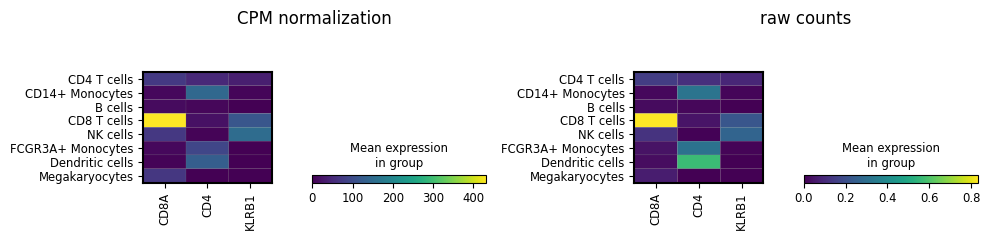

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2.5))
genes_of_interest = ["CD8A", "CD4", "KLRB1"]
sc.pl.matrixplot(
    adata,
    groupby="louvain_cell_types",
    var_names=genes_of_interest,
    layer="counts_per_million",  ## set which layer to plot
    ax=ax1,
    show=False,
)
ax1.set_title("CPM normalization")

sc.pl.matrixplot(
    adata,
    groupby="louvain_cell_types",
    var_names=genes_of_interest,
    layer="raw",  ## set which layer to plot
    ax=ax2,
    show=False,
)
ax2.set_title("raw counts")
plt.tight_layout()

In [16]:
adata.obs

,n_genes,percent_mito,n_counts,louvain_cell_types
cell_barcode,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells


In [17]:
adata.obs["louvain_cell_types"]

,louvain_cell_types
cell_barcode,
AAACATACAACCAC-1,CD4 T cells
AAACATTGAGCTAC-1,B cells
AAACATTGATCAGC-1,CD4 T cells
AAACCGTGCTTCCG-1,CD14+ Monocytes
AAACCGTGTATGCG-1,NK cells
...,...
TTTCGAACTCTCAT-1,CD14+ Monocytes
TTTCTACTGAGGCA-1,B cells
TTTCTACTTCCTCG-1,B cells


In [18]:
adata.obs["is_low_quality"] = adata.obs["percent_mito"] > 0.03
adata.obs  # to inspect the updated table

,n_genes,percent_mito,n_counts,louvain_cell_types,is_low_quality
cell_barcode,,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells,True
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells,True
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells,False
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes,False
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells,False
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes,False
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells,False
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells,False


In [19]:
adata.var

,gene_names,n_cells,gene_ids
gene_names,,,
LINC00115,LINC00115,18,ENSG00000225880
NOC2L,NOC2L,258,ENSG00000188976
KLHL17,KLHL17,9,ENSG00000187961
PLEKHN1,PLEKHN1,7,ENSG00000187583
HES4,HES4,145,ENSG00000188290
...,...,...,...
MT-ND4L,MT-ND4L,398,ENSG00000212907
MT-ND4,MT-ND4,2588,ENSG00000198886
MT-ND5,MT-ND5,1399,ENSG00000198786


In [20]:
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', name='cell_barcode', length=2638)

In [21]:
adata.var_names

Index(['LINC00115', 'NOC2L', 'KLHL17', 'PLEKHN1', 'HES4', 'ISG15', 'AGRN',
       'C1orf159', 'TNFRSF18', 'TNFRSF4',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', name='gene_names', length=11505)

In [22]:
adata.var_names = adata.var["gene_ids"]

In [23]:
adata.var_names = adata.var["gene_names"]
adata.var

,gene_names,n_cells,gene_ids
gene_names,,,
LINC00115,LINC00115,18,ENSG00000225880
NOC2L,NOC2L,258,ENSG00000188976
KLHL17,KLHL17,9,ENSG00000187961
PLEKHN1,PLEKHN1,7,ENSG00000187583
HES4,HES4,145,ENSG00000188290
...,...,...,...
MT-ND4L,MT-ND4L,398,ENSG00000212907
MT-ND4,MT-ND4,2588,ENSG00000198886
MT-ND5,MT-ND5,1399,ENSG00000198786


In [24]:
adata_small = adata[:5, ["LYZ", "FOS", "MALAT1"]]
adata_small.shape

(5, 3)

In [25]:
# active data (log-normalized counts) after subsetting
adata_small.X.toarray()  # we use .toarray() just for display reasons here:
# it turns the sparse data in X into a dense array that can be nicely printed

array([[0.6496621 , 2.4036813 , 3.8249342 ],
       [0.8553989 , 0.64266497, 4.174533  ],
       [0.878057  , 2.8014445 , 4.7918878 ],
       [3.0494576 , 1.6464083 , 2.3237872 ],
       [0.        , 0.        , 3.923651  ]], dtype=float32)

In [26]:
# raw data layer after subsetting
adata_small.layers["raw"].toarray()

array([[  1,  11,  49],
       [  3,   2, 142],
       [  2,  22, 170],
       [ 24,   5,  11],
       [  0,   0,  22]])

In [27]:
# cell annotations after subsetting
adata_small.obs

,n_genes,percent_mito,n_counts,louvain_cell_types,is_low_quality
cell_barcode,,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells,True
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells,True
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells,False
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes,False
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells,False


In [28]:
adata_small.var

,gene_names,n_cells,gene_ids
gene_names,,,
LYZ,LYZ,1631,ENSG00000090382
FOS,FOS,2473,ENSG00000170345
MALAT1,MALAT1,2699,ENSG00000251562


In [29]:
adata_high_quality = adata[~adata.obs["is_low_quality"], :]

In [30]:
# obs data frame after subsettings shows that the low-quality cells are gone
adata_high_quality.obs

,n_genes,percent_mito,n_counts,louvain_cell_types,is_low_quality
cell_barcode,,,,,
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells,False
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes,False
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells,False
AAACGCACTGGTAC-1,782,0.016644,2163.0,CD8 T cells,False
AAACGCTGTAGCCA-1,533,0.011765,1275.0,CD4 T cells,False
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes,False
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells,False
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells,False
